In [3]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [5]:
# Import custom modules
from src.backtesting.backtest_engine import BacktestEngine
from src.backtesting.performance_metrics import PerformanceMetrics
from src.backtesting.visualization import Visualization
from src.models.benchmark_model import BenchmarkModel
from src.models.sector_rotation import SectorRotationModel


In [6]:
# Set up matplotlib for inline plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [7]:
# Create a directory for saving results
reports_dir = project_root / "reports"
os.makedirs(reports_dir, exist_ok=True)

# Create a figures directory
figures_dir = reports_dir / "figures"
os.makedirs(figures_dir, exist_ok=True)


In [8]:
# Initialize data directories
data_dir = project_root / "data"
processed_dir = data_dir / "processed"


In [9]:
# Load processed data files
portfolio_data = pd.read_csv(processed_dir / "portfolio_data.csv")
price_data = pd.read_csv(processed_dir / "price_data.csv")
sector_data = pd.read_csv(processed_dir / "sector_data.csv")
macro_data = pd.read_csv(processed_dir / "macro_data.csv")

In [10]:
# Convert date columns to datetime
price_data['Date'] = pd.to_datetime(price_data['Date'])
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
macro_data['Date'] = pd.to_datetime(macro_data['Date'])

In [11]:
# Display sample data
print("Portfolio Data Sample:")
display(portfolio_data.head())

print("\nPrice Data Sample:")
display(price_data.head())

print("\nSector Data Sample:")
display(sector_data.head())

print("\nMacro Data Sample:")
display(macro_data.head())

Portfolio Data Sample:


,Ticker,Quantity,Sector,Close,Weight,Market_Value
0,AAPL,1,IT,218.270004,0.034613,218.270004
1,ADAP,1,Pharmaceuticals,0.291000,0.000046,0.291000
2,AGCO,1,Agriculture,93.089996,0.014762,93.089996
3,BA,2,Military Engineering,178.110001,0.028244,356.220002
4,BG,4,Agriculture,73.250000,0.011616,293.000000



Price Data Sample:


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700



Sector Data Sample:


,Date,Sector,Returns,Volume,Adjusted,Cumulative_Returns,Return_20d,Return_50d,Volatility_20d
0,2020-01-03,Agriculture,0.000549,2805900,63.694440,0.000549,NaN,NaN,NaN
1,2020-01-06,Agriculture,-0.021966,6735700,63.148425,-0.021429,NaN,NaN,NaN
2,2020-01-07,Agriculture,-0.018431,3847400,62.177122,-0.039465,NaN,NaN,NaN
3,2020-01-08,Agriculture,0.013643,4733300,62.534611,-0.026360,NaN,NaN,NaN
4,2020-01-09,Agriculture,0.004517,3463300,62.794615,-0.021963,NaN,NaN,NaN



Macro Data Sample:


,Date,Market_Return,Risk_Free_Rate,VIX
0,2020-01-03,-0.002342,0.000124,28.977121
1,2020-01-06,-0.007476,0.000144,15.557390
2,2020-01-07,-0.001014,0.000097,18.657917
3,2020-01-08,-0.004485,0.000188,17.323161
4,2020-01-09,-0.001509,0.000087,15.946562


In [12]:
# Check date range
price_date_range = (price_data['Date'].min(), price_data['Date'].max())
print(f"Price data date range: {price_date_range[0]} to {price_date_range[1]}")


Price data date range: 2020-01-03 00:00:00 to 2025-03-21 00:00:00


In [13]:
# Check available sectors
available_sectors = sector_data['Sector'].unique()
print(f"\nAvailable sectors ({len(available_sectors)}):")
for sector in sorted(available_sectors):
    print(f"- {sector}")


Available sectors (12):
- Agriculture
- Consumer Goods
- Engineering
- Entertainment
- Finance
- Food & Beverages
- Healthcare
- IT
- Military Engineering
- Natural Resources
- Pharmaceuticals
- Telecommunications


In [14]:
# Check data completeness
missing_values = {
    'Portfolio Data': portfolio_data.isnull().sum().sum(),
    'Price Data': price_data.isnull().sum().sum(),
    'Sector Data': sector_data.isnull().sum().sum(),
    'Macro Data': macro_data.isnull().sum().sum()
}

In [15]:

print("\nMissing values in each dataset:")
for dataset, count in missing_values.items():
    print(f"- {dataset}: {count}")



Missing values in each dataset:
- Portfolio Data: 0
- Price Data: 0
- Sector Data: 1044
- Macro Data: 0


In [16]:
# Check columns in macro_data
print("\nColumns in macro_data:")
print(macro_data.columns.tolist())


Columns in macro_data:
['Date', 'Market_Return', 'Risk_Free_Rate', 'VIX']


In [17]:
# Initialize backtest engine
backtest_engine = BacktestEngine()

2025-05-06 20:50:23,755 - src.backtesting.backtest_engine - INFO - BacktestEngine initialized with data directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [18]:

# Run benchmark strategies
benchmark_model = BenchmarkModel()
benchmark_results = benchmark_model.run_all_benchmarks()

2025-05-06 20:50:27,459 - src.models.benchmark_model - INFO - BenchmarkModel initialized with data directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data
2025-05-06 20:50:27,461 - src.models.benchmark_model - INFO - Running all benchmark strategies
2025-05-06 20:50:27,462 - src.models.benchmark_model - INFO - Loading processed portfolio data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\portfolio_data.csv
2025-05-06 20:50:27,463 - src.models.benchmark_model - INFO - Loading processed price data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\price_data.csv
2025-05-06 20:50:27,518 - src.models.benchmark_model - INFO - Loading processed sector data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\sector_data.csv
2025-05-06 20:50:27,553 - src.models.benchmark_model - INFO - Processed data loaded successfully
2025-05-06 20:50:27,554 - src.models.benchmark_model - INFO - Implementing buy and hold strat

In [19]:
# Save benchmark results
backtest_engine.strategies['benchmark'] = benchmark_model
backtest_engine.results['benchmark'] = benchmark_results

# Display benchmark results
print("Benchmark Strategy Results:")
display(benchmark_results.head())

Benchmark Strategy Results:


,Date,Strategy,Daily_Return,Tickers_Count,Cumulative_Return
0,2020-01-03,Buy and Hold,-0.005690,27,-0.005690
1,2020-01-06,Buy and Hold,0.006915,27,0.001185
2,2020-01-07,Buy and Hold,-0.007120,27,-0.005943
3,2020-01-08,Buy and Hold,0.009818,27,0.003817
4,2020-01-09,Buy and Hold,0.002831,27,0.006658


In [20]:
# Check final performance of each benchmark strategy
final_benchmark_performance = benchmark_results.groupby('Strategy')['Cumulative_Return'].last()
print("\nFinal Benchmark Performance:")
display(final_benchmark_performance)


Final Benchmark Performance:


Strategy
Buy and Hold           1.552169
Equal Weight           0.909476
Market Cap Weighted    0.811153
Name: Cumulative_Return, dtype: float64

In [21]:
# Initialize sector rotation model
sector_rotation = SectorRotationModel()

2025-05-06 20:50:47,152 - src.models.sector_rotation - INFO - SectorRotationModel initialized with data directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [22]:
# Run all sector rotation strategies
sector_rotation_results = sector_rotation.run_all_strategies()


2025-05-06 20:50:51,528 - src.models.sector_rotation - INFO - Running all sector rotation strategies
2025-05-06 20:50:51,529 - src.models.sector_rotation - INFO - Loading processed portfolio data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\portfolio_data.csv
2025-05-06 20:50:51,532 - src.models.sector_rotation - INFO - Loading processed price data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\price_data.csv
2025-05-06 20:50:51,585 - src.models.sector_rotation - INFO - Loading sector indicators from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\sector_indicators.csv
2025-05-06 20:50:51,699 - src.models.sector_rotation - INFO - Loading macro indicators from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\macro_indicators.csv
2025-05-06 20:50:51,710 - src.models.sector_rotation - INFO - Processed data loaded successfully
2025-05-06 20:50:51,711 - src.models.sector_rotation - INFO - Implementi

In [23]:
# Save sector rotation results
backtest_engine.strategies['sector_rotation'] = sector_rotation
backtest_engine.results['sector_rotation'] = sector_rotation_results

# Display sector rotation results
print("Sector Rotation Strategy Results:")
display(sector_rotation_results.head())

Sector Rotation Strategy Results:


,Date,Strategy,Daily_Return,Sectors_Count,Selected_Sectors,Cumulative_Return
0,2020-01-03,Momentum Sector Rotation,-0.004405,3,"Agriculture, Consumer Goods, Engineering",-0.004405
1,2020-01-06,Momentum Sector Rotation,-0.007573,3,"Agriculture, Consumer Goods, Engineering",-0.011945
2,2020-01-07,Momentum Sector Rotation,-0.009846,3,"Agriculture, Consumer Goods, Engineering",-0.021673
3,2020-01-08,Momentum Sector Rotation,0.007377,3,"Agriculture, Consumer Goods, Engineering",-0.014456
4,2020-01-09,Momentum Sector Rotation,0.005187,3,"Agriculture, Consumer Goods, Engineering",-0.009344


In [24]:
# Check final performance of each sector rotation strategy
final_sector_rotation_performance = sector_rotation_results.groupby('Strategy')['Cumulative_Return'].last()
print("\nFinal Sector Rotation Performance:")
display(final_sector_rotation_performance)



Final Sector Rotation Performance:


Strategy
Combined Sector Rotation             1.246204
Economic Cycle Sector Rotation       1.323089
Momentum Sector Rotation             1.323089
Relative Strength Sector Rotation    1.785271
Name: Cumulative_Return, dtype: float64

In [25]:
# Combine all results
all_results = backtest_engine.combine_strategy_results()

2025-05-06 20:51:19,770 - src.backtesting.backtest_engine - INFO - Combining results for strategies : ['benchmark', 'sector_rotation']
2025-05-06 20:51:19,818 - src.backtesting.backtest_engine - INFO - Combined results saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\combined_results.csv


In [26]:
# Initialize performance metrics calculator
performance_metrics = PerformanceMetrics()

2025-05-06 20:51:23,536 - src.backtesting.performance_metrics - INFO - PerformanceMetrics initialized


In [27]:
# Fix for different array dimensions
# Create aligned data for all strategies with the benchmark
benchmark_data = all_results[all_results['Strategy'] == 'Buy and Hold'].copy()
benchmark_dates = set(benchmark_data['Date'])

In [28]:
# Align all strategies with common dates
aligned_results = []
for strategy in all_results['Strategy'].unique():
    strategy_data = all_results[all_results['Strategy'] == strategy]
    
    # Get common dates with benchmark
    common_dates = list(set(strategy_data['Date']).intersection(benchmark_dates))
    if not common_dates:
        print(f"Warning: No common dates between {strategy} and benchmark")
        continue
        
    # Filter to common dates and sort by date
    strategy_aligned = strategy_data[strategy_data['Date'].isin(common_dates)].sort_values('Date')
    aligned_results.append(strategy_aligned)


In [29]:
# Combine the aligned results
aligned_all_results = pd.concat(aligned_results, ignore_index=True)


In [30]:
# Filter benchmark to the same dates
all_dates = set(aligned_all_results['Date'])
aligned_benchmark = benchmark_data[benchmark_data['Date'].isin(all_dates)].sort_values('Date')


In [31]:
# Evaluate strategies with aligned data
all_metrics = performance_metrics.evaluate_strategy(
    aligned_all_results,
    market_returns=aligned_benchmark,
    risk_free_rate=0.02  # Assume 2% annualized risk-free rate
)

2025-05-06 20:51:48,747 - src.backtesting.performance_metrics - INFO - Evaluating strategy
2025-05-06 20:51:48,766 - src.backtesting.performance_metrics - INFO - Calculating all performance metrics
2025-05-06 20:51:48,767 - src.backtesting.performance_metrics - INFO - Calculating returns
2025-05-06 20:51:48,768 - src.backtesting.performance_metrics - INFO - Calculating volatility
2025-05-06 20:51:48,769 - src.backtesting.performance_metrics - INFO - Calculating Sharpe ratio
2025-05-06 20:51:48,770 - src.backtesting.performance_metrics - INFO - Calculating Sortino ratio
2025-05-06 20:51:48,771 - src.backtesting.performance_metrics - INFO - Calculating maximum drawdown
2025-05-06 20:51:48,772 - src.backtesting.performance_metrics - INFO - Calculating Calmar ratio
2025-05-06 20:51:48,772 - src.backtesting.performance_metrics - INFO - Calculating returns
2025-05-06 20:51:48,773 - src.backtesting.performance_metrics - INFO - Calculating maximum drawdown
2025-05-06 20:51:48,775 - src.backtes

In [32]:
# Display performance metrics
print("Performance Metrics for All Strategies:")
display(all_metrics)

Performance Metrics for All Strategies:


,total_return,annualized_return,volatility,sharpe_ratio,sortino_ratio,max_drawdown,calmar_ratio,ulcer_index,beta,alpha,Strategy
0,1.552169,0.197336,0.214118,0.855552,1.215186,-0.304346,0.648394,0.071588,1.000000,0.000000,Buy and Hold
1,0.909476,0.132393,0.214951,0.593559,0.829258,-0.336060,0.393957,0.077803,0.957646,-0.057432,Equal Weight
2,0.811153,0.120944,0.203494,0.565283,0.788820,-0.352088,0.343506,0.063342,0.914322,-0.061198,Market Cap Weighted
3,1.323089,0.175886,0.218871,0.758750,1.082045,-0.306673,0.573529,0.077780,0.808018,0.012595,Momentum Sector Rotation
4,1.785271,0.229175,0.209741,0.993626,1.459056,-0.169423,1.352681,0.063788,0.825559,0.029827,Relative Strength Sector Rotation
5,1.323089,0.175886,0.218871,0.758750,1.082045,-0.306673,0.573529,0.077780,0.808018,0.012595,Economic Cycle Sector Rotation
6,1.246204,0.168303,0.230522,0.703648,1.007081,-0.306673,0.548803,0.072363,0.860068,-0.004218,Combined Sector Rotation


In [33]:
# Format the metrics for better readability
formatted_metrics = all_metrics.copy()
for col in ['annualized_return', 'volatility', 'max_drawdown']:
    if col in formatted_metrics.columns:
        formatted_metrics[col] = formatted_metrics[col].map('{:.2%}'.format)
for col in ['sharpe_ratio', 'sortino_ratio', 'calmar_ratio', 'alpha', 'beta', 'information_ratio']:
    if col in formatted_metrics.columns:
        formatted_metrics[col] = formatted_metrics[col].map('{:.2f}'.format)

print("\nFormatted Performance Metrics:")
display(formatted_metrics)


Formatted Performance Metrics:


,total_return,annualized_return,volatility,sharpe_ratio,sortino_ratio,max_drawdown,calmar_ratio,ulcer_index,beta,alpha,Strategy
0,1.552169,19.73%,21.41%,0.86,1.22,-30.43%,0.65,0.071588,1.00,0.00,Buy and Hold
1,0.909476,13.24%,21.50%,0.59,0.83,-33.61%,0.39,0.077803,0.96,-0.06,Equal Weight
2,0.811153,12.09%,20.35%,0.57,0.79,-35.21%,0.34,0.063342,0.91,-0.06,Market Cap Weighted
3,1.323089,17.59%,21.89%,0.76,1.08,-30.67%,0.57,0.077780,0.81,0.01,Momentum Sector Rotation
4,1.785271,22.92%,20.97%,0.99,1.46,-16.94%,1.35,0.063788,0.83,0.03,Relative Strength Sector Rotation
5,1.323089,17.59%,21.89%,0.76,1.08,-30.67%,0.57,0.077780,0.81,0.01,Economic Cycle Sector Rotation
6,1.246204,16.83%,23.05%,0.70,1.01,-30.67%,0.55,0.072363,0.86,-0.00,Combined Sector Rotation


#  visualization


In [34]:
# Initialize visualization
visualization = Visualization()

2025-05-06 20:52:32,495 - src.backtesting.visualization - INFO - Visualization initialized with figures directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures


2025-05-06 20:52:36,687 - src.backtesting.visualization - INFO - Plotting cumulative returns
2025-05-06 20:52:37,526 - src.backtesting.visualization - INFO - Cumulative returns plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\cumulative_returns.png


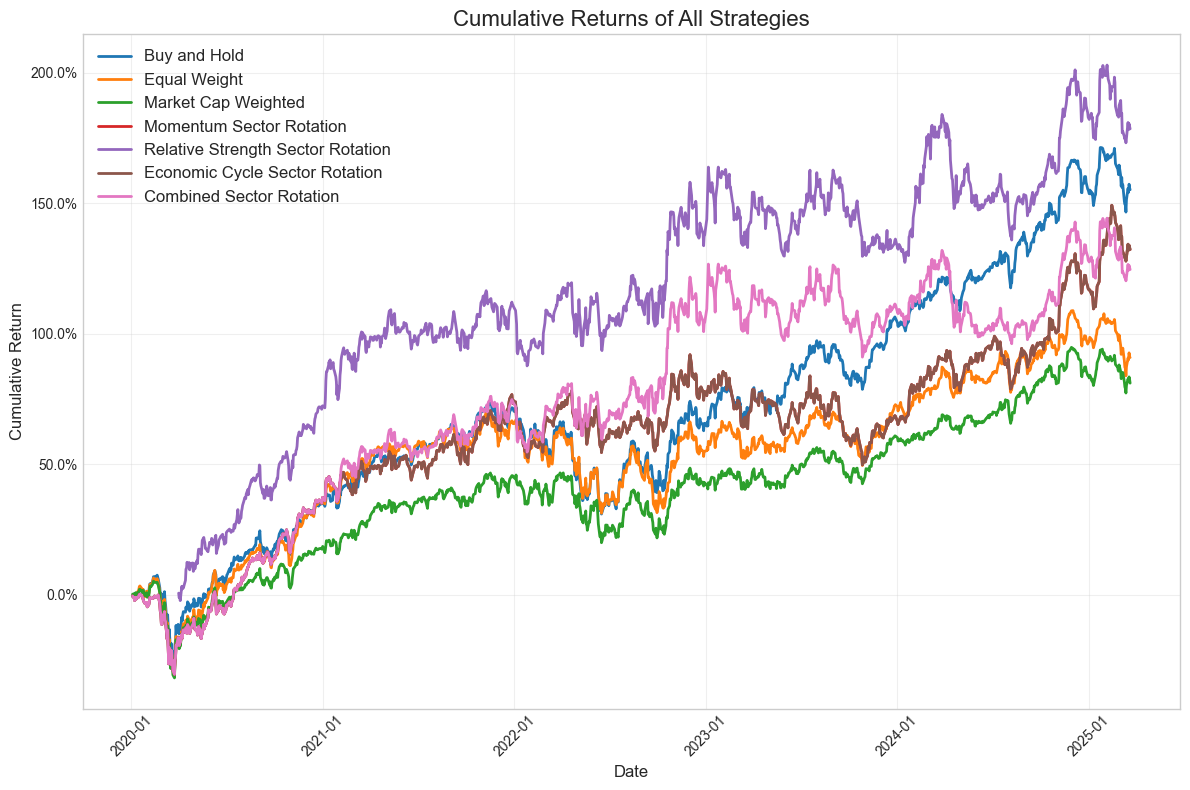

In [35]:
# Plot cumulative returns
visualization.plot_cumulative_returns(all_results, title="Cumulative Returns of All Strategies")
plt.show()

2025-05-06 20:52:40,328 - src.backtesting.visualization - INFO - Plotting drawdowns
2025-05-06 20:52:41,261 - src.backtesting.visualization - INFO - Drawdowns plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\drawdowns.png


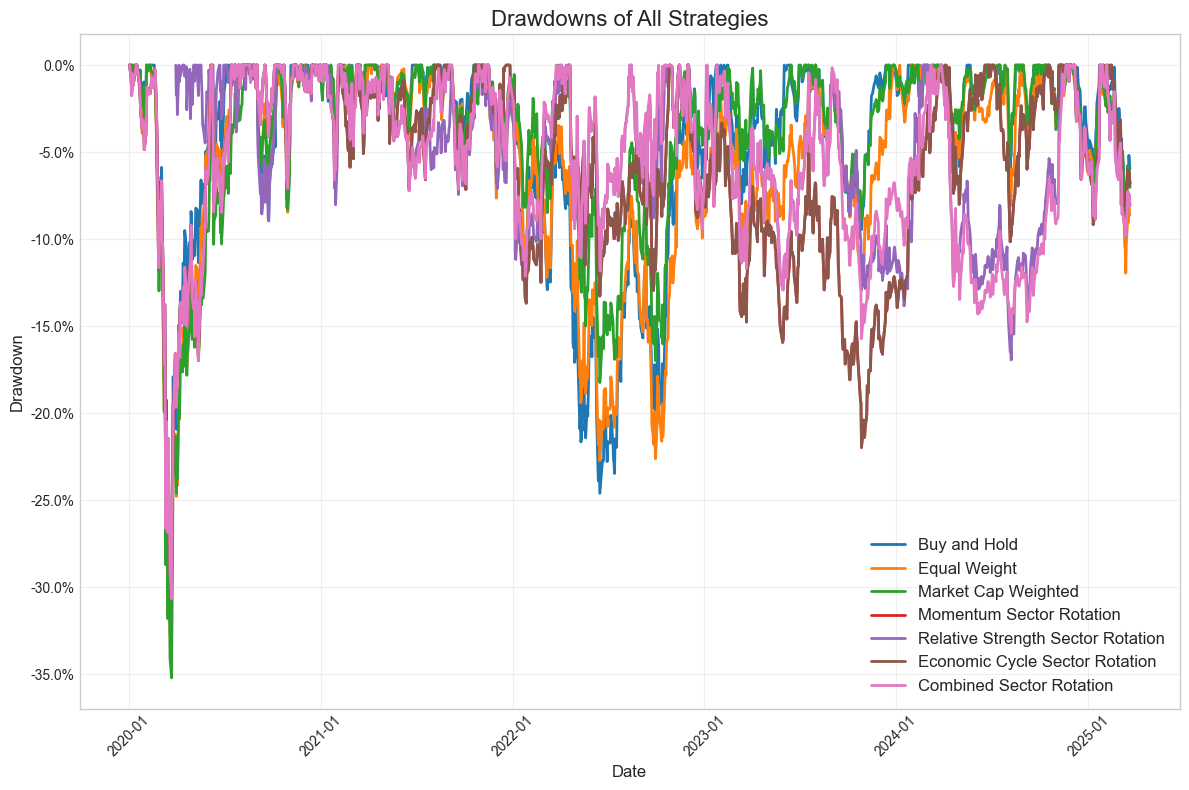

In [36]:
# Plot drawdowns
visualization.plot_drawdowns(all_results, title="Drawdowns of All Strategies")
plt.show()

2025-05-06 20:52:44,083 - src.backtesting.visualization - INFO - Plotting 60-day rolling returns
2025-05-06 20:52:44,995 - src.backtesting.visualization - INFO - Rolling returns plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\rolling_returns_60d.png


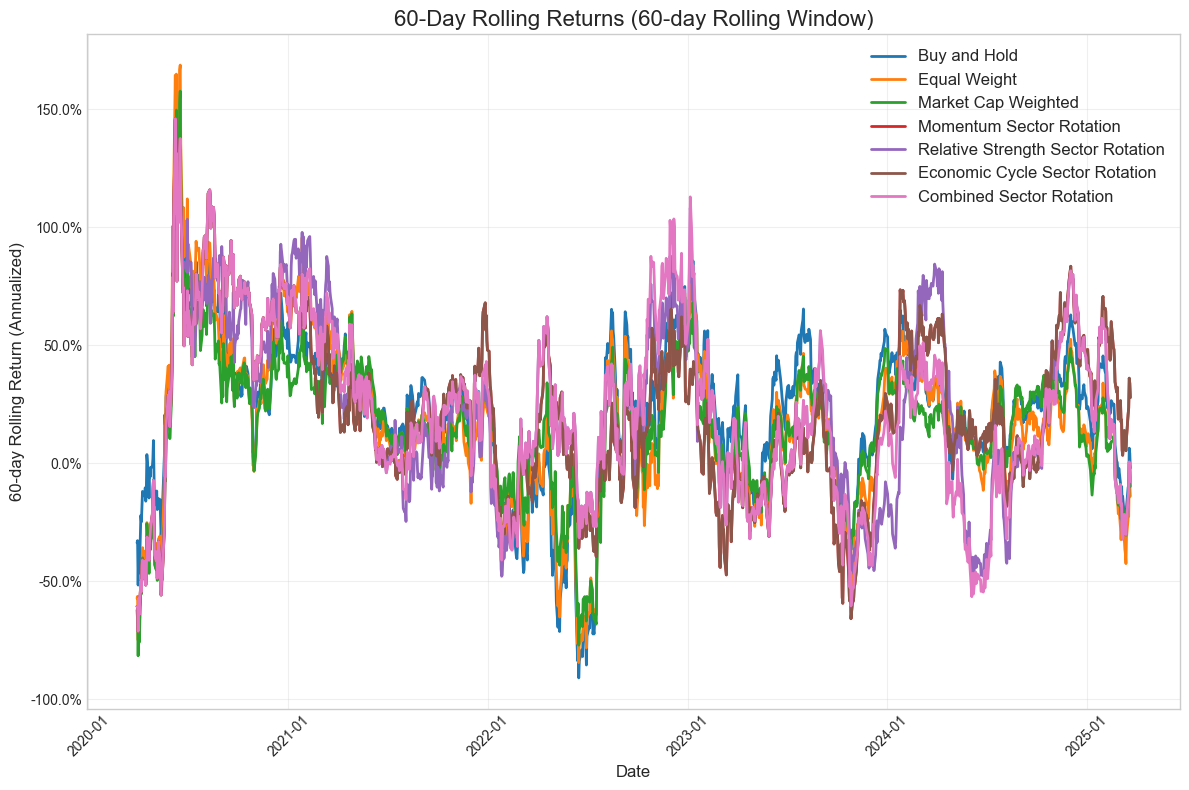

In [37]:
visualization.plot_rolling_returns(all_results, window=60, title="60-Day Rolling Returns")
plt.show()

2025-05-06 20:52:48,833 - src.backtesting.visualization - INFO - Plotting 60-day rolling volatility
2025-05-06 20:52:49,677 - src.backtesting.visualization - INFO - Rolling volatility plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\rolling_volatility_60d.png


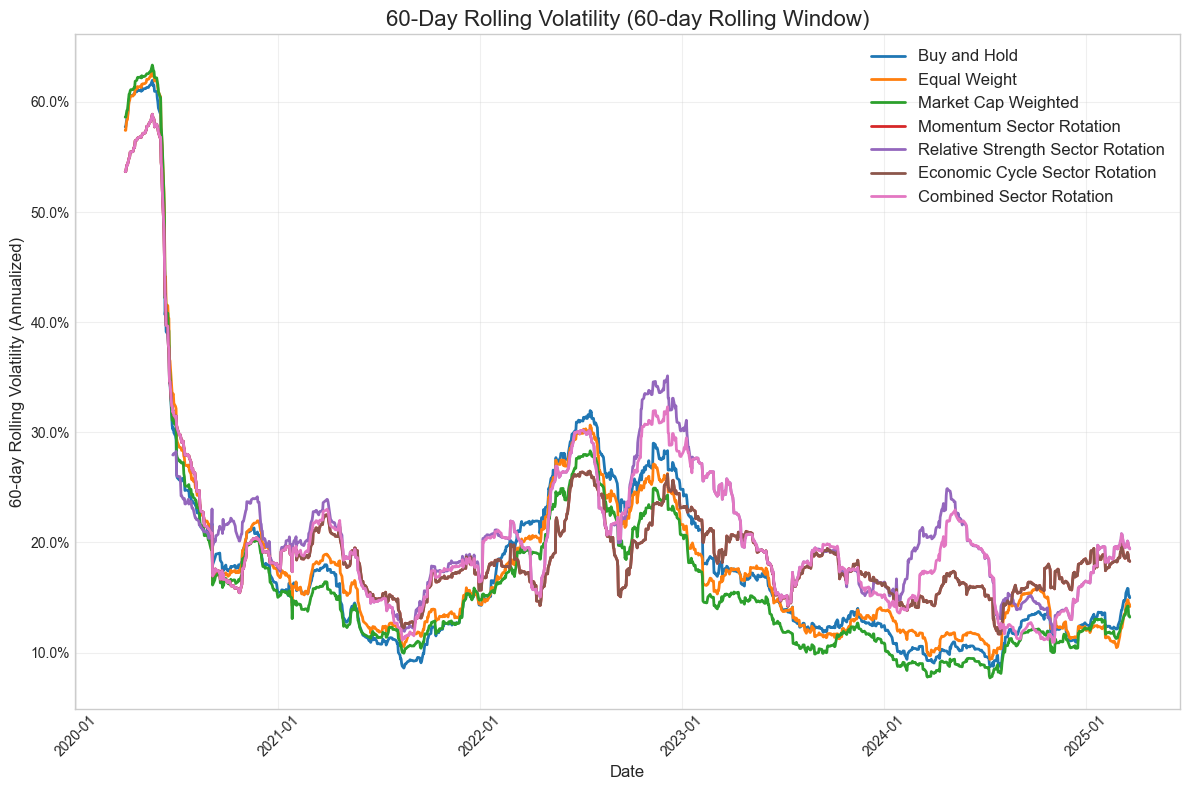

In [38]:
# Plot rolling volatility
visualization.plot_rolling_volatility(all_results, window=60, title="60-Day Rolling Volatility")
plt.show()


2025-05-06 20:52:53,122 - src.backtesting.visualization - INFO - Plotting 60-day rolling Sharpe ratio
2025-05-06 20:52:54,080 - src.backtesting.visualization - INFO - Rolling Sharpe ratio plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\rolling_sharpe_60d.png


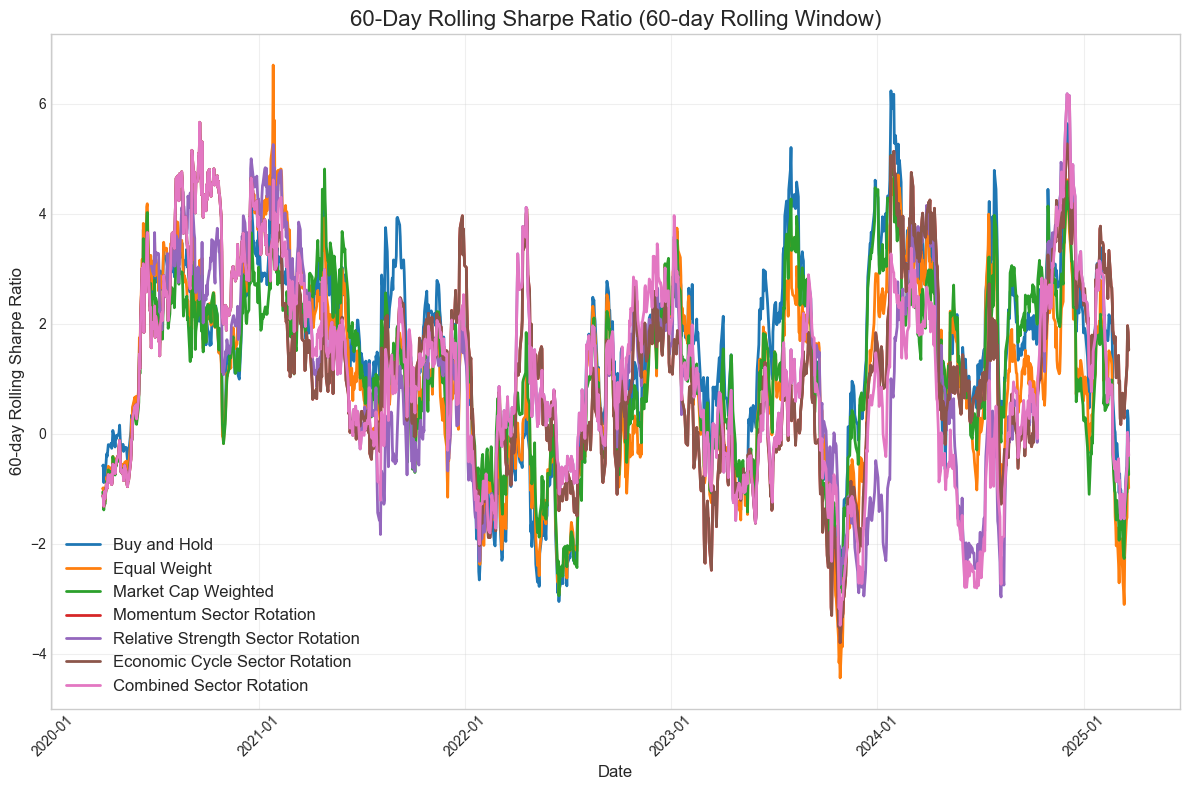

In [39]:
# Plot rolling Sharpe ratio
visualization.plot_rolling_sharpe(all_results, window=60, title="60-Day Rolling Sharpe Ratio")
plt.show()


2025-05-06 20:52:58,508 - src.backtesting.visualization - INFO - Plotting performance metrics
2025-05-06 20:53:01,036 - src.backtesting.visualization - INFO - Performance metrics plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\performance_metrics.png


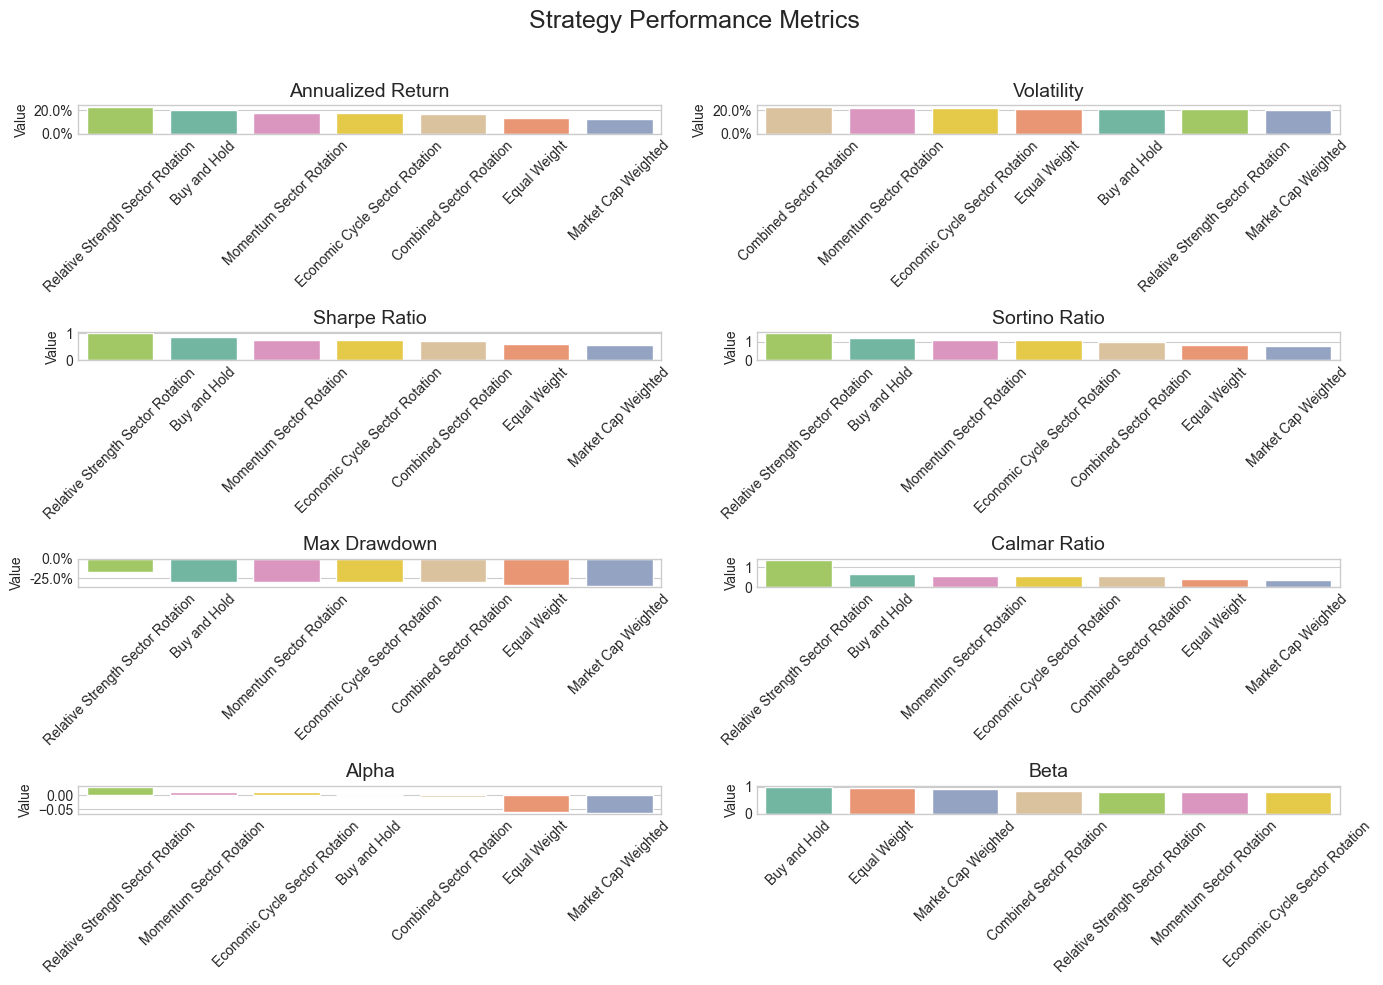

In [40]:
# Plot performance metrics
visualization.plot_performance_metrics(all_metrics)
plt.show()

2025-05-06 20:53:03,960 - src.backtesting.visualization - INFO - Plotting sector allocation over time
2025-05-06 20:53:04,945 - src.backtesting.visualization - INFO - Sector allocation plot for Momentum Sector Rotation saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\sector_allocation_momentum_sector_rotation.png


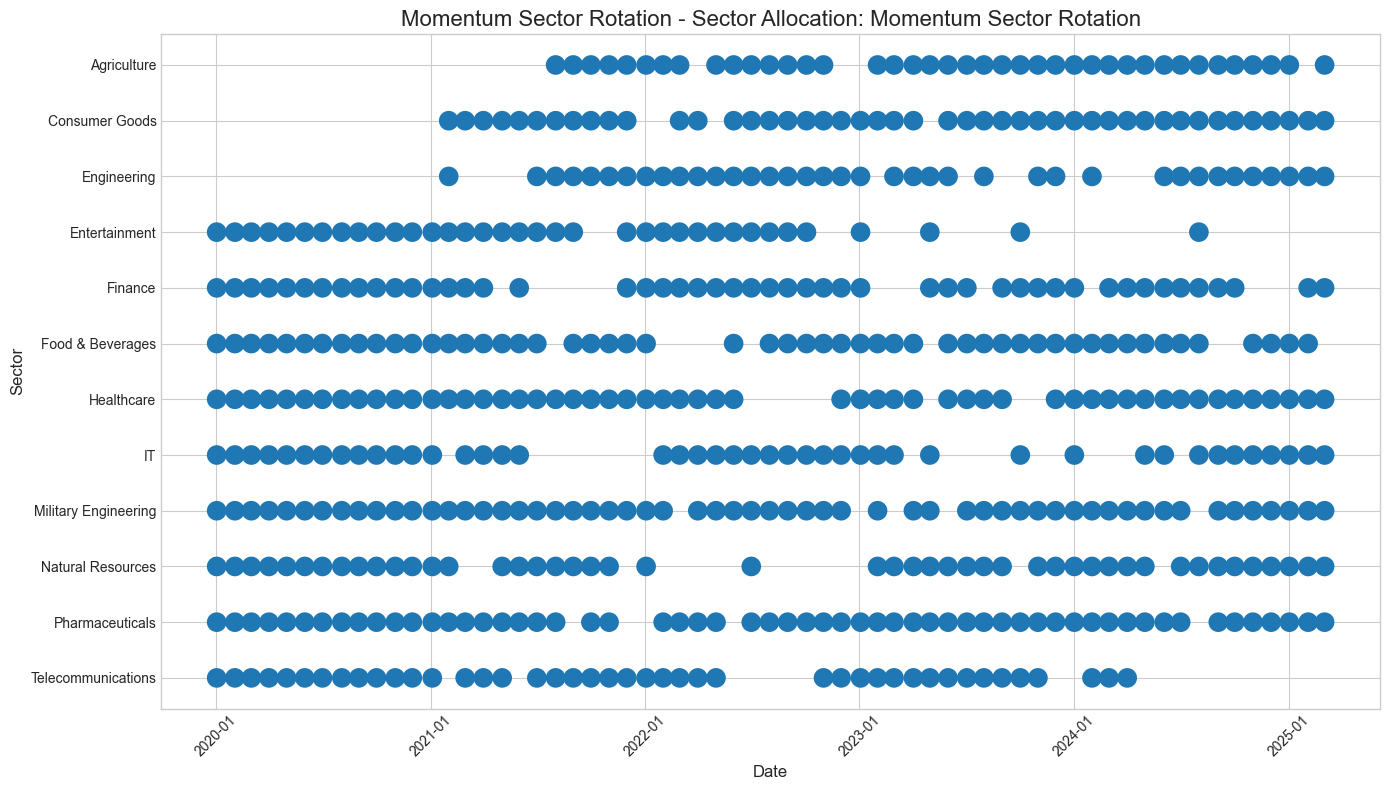

2025-05-06 20:53:05,276 - src.backtesting.visualization - INFO - Plotting sector allocation over time
2025-05-06 20:53:06,284 - src.backtesting.visualization - INFO - Sector allocation plot for Relative Strength Sector Rotation saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\sector_allocation_relative_strength_sector_rotation.png


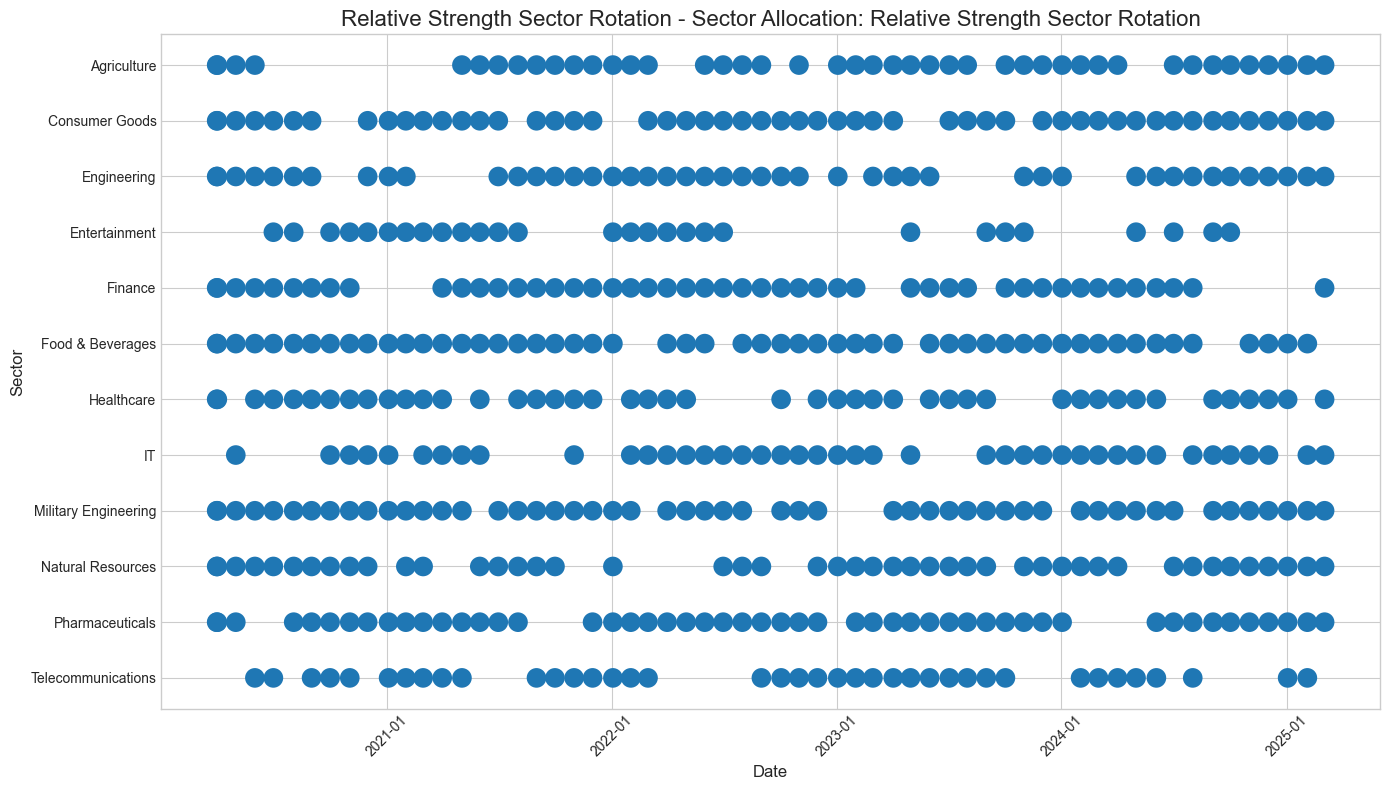

2025-05-06 20:53:06,681 - src.backtesting.visualization - INFO - Plotting sector allocation over time
2025-05-06 20:53:07,658 - src.backtesting.visualization - INFO - Sector allocation plot for Economic Cycle Sector Rotation saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\sector_allocation_economic_cycle_sector_rotation.png


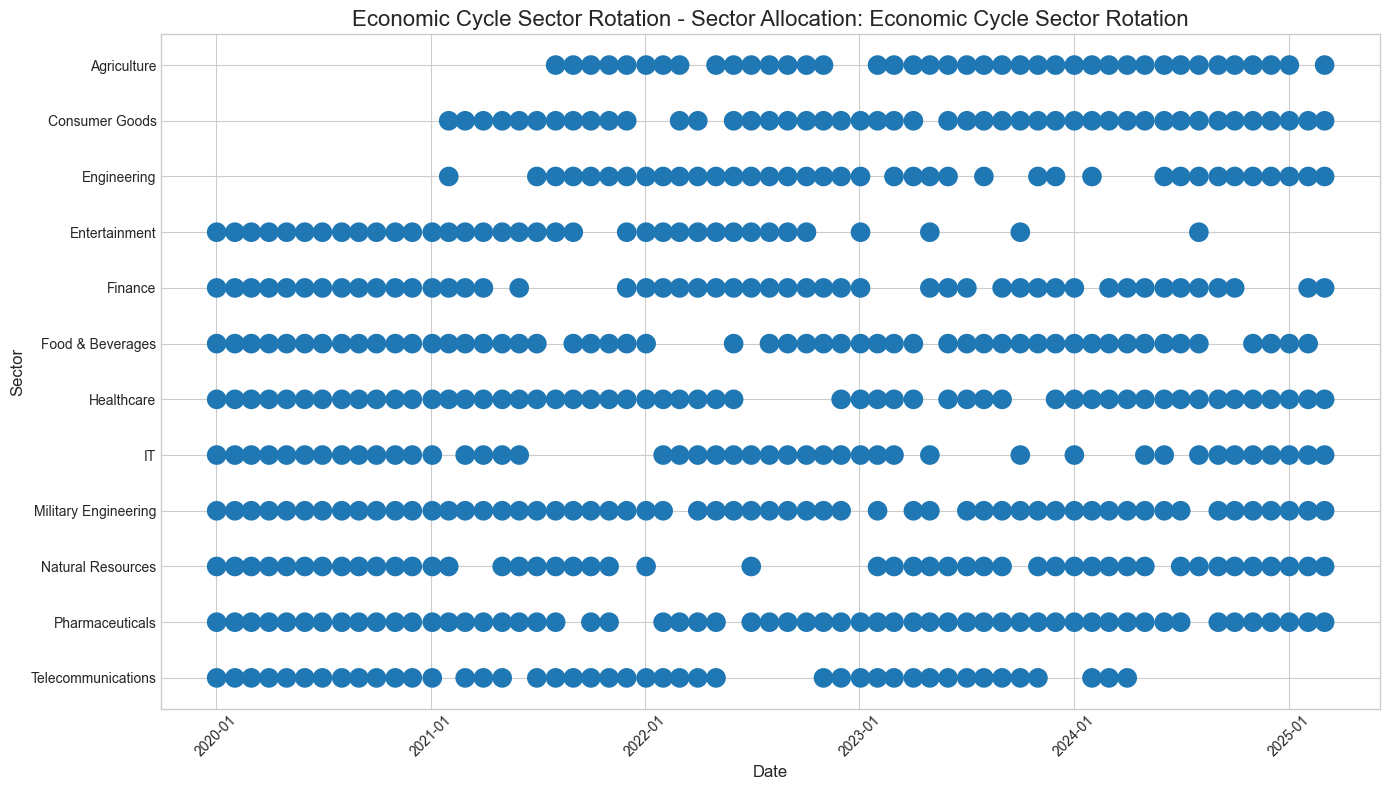

2025-05-06 20:53:08,045 - src.backtesting.visualization - INFO - Plotting sector allocation over time
2025-05-06 20:53:09,074 - src.backtesting.visualization - INFO - Sector allocation plot for Combined Sector Rotation saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\sector_allocation_combined_sector_rotation.png


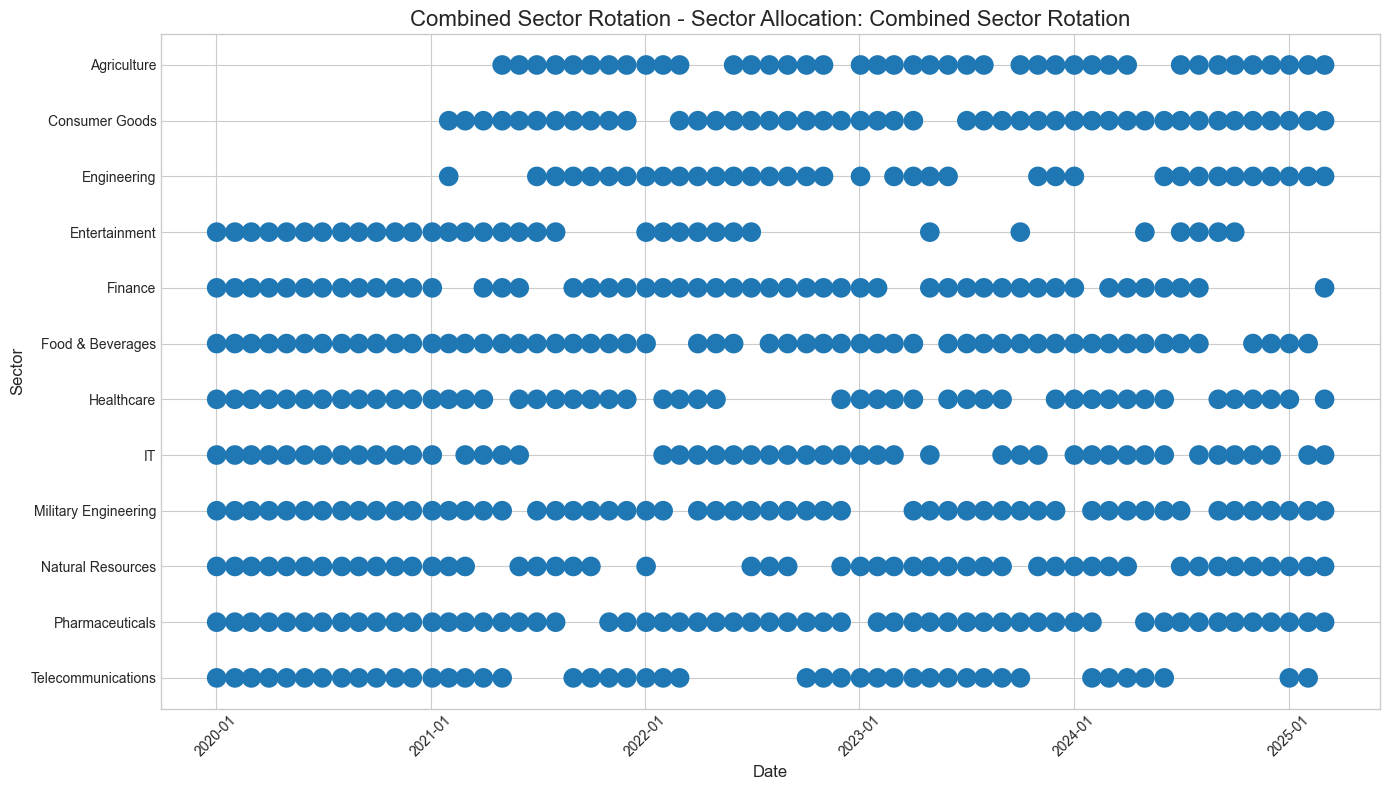

In [41]:
# Plot sector allocation for each sector rotation strategy
sector_strategies = [
    'Momentum Sector Rotation',
    'Relative Strength Sector Rotation',
    'Economic Cycle Sector Rotation',
    'Combined Sector Rotation'
]

for strategy in sector_strategies:
    strategy_data = all_results[all_results['Strategy'] == strategy]
    if 'Selected_Sectors' in strategy_data.columns:
        visualization.plot_sector_allocation(strategy_data, title=f"{strategy} - Sector Allocation")
        plt.show()

2025-05-06 20:53:10,576 - src.backtesting.visualization - INFO - Plotting monthly returns heatmap for Relative Strength Sector Rotation
2025-05-06 20:53:11,441 - src.backtesting.visualization - INFO - Monthly returns heatmap saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\monthly_returns_relative_strength_sector_rotation.png


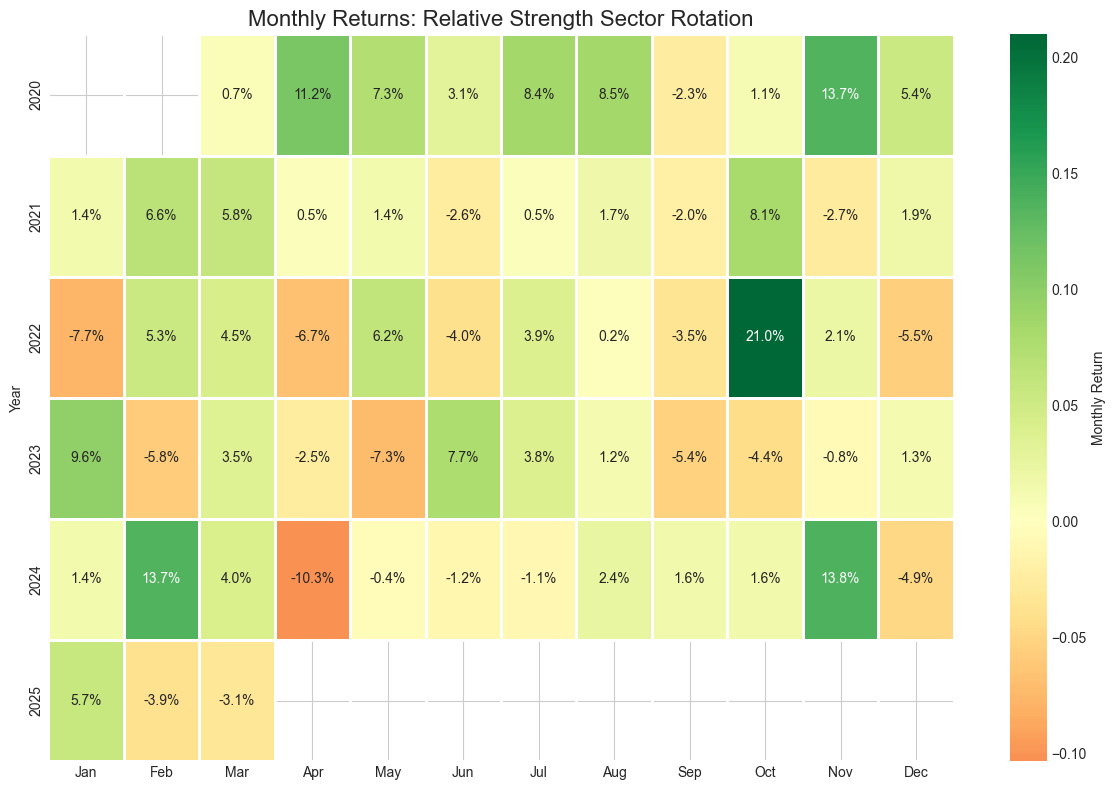

In [42]:
# Plot monthly returns heatmap for the best performing strategy
best_strategy = all_metrics.loc[all_metrics['annualized_return'].idxmax(), 'Strategy']
visualization.plot_monthly_returns_heatmap(all_results, best_strategy)
plt.show()

2025-05-06 20:53:15,486 - src.backtesting.visualization - INFO - Plotting returns distribution
2025-05-06 20:53:17,153 - src.backtesting.visualization - INFO - Returns distribution plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\returns_distribution.png


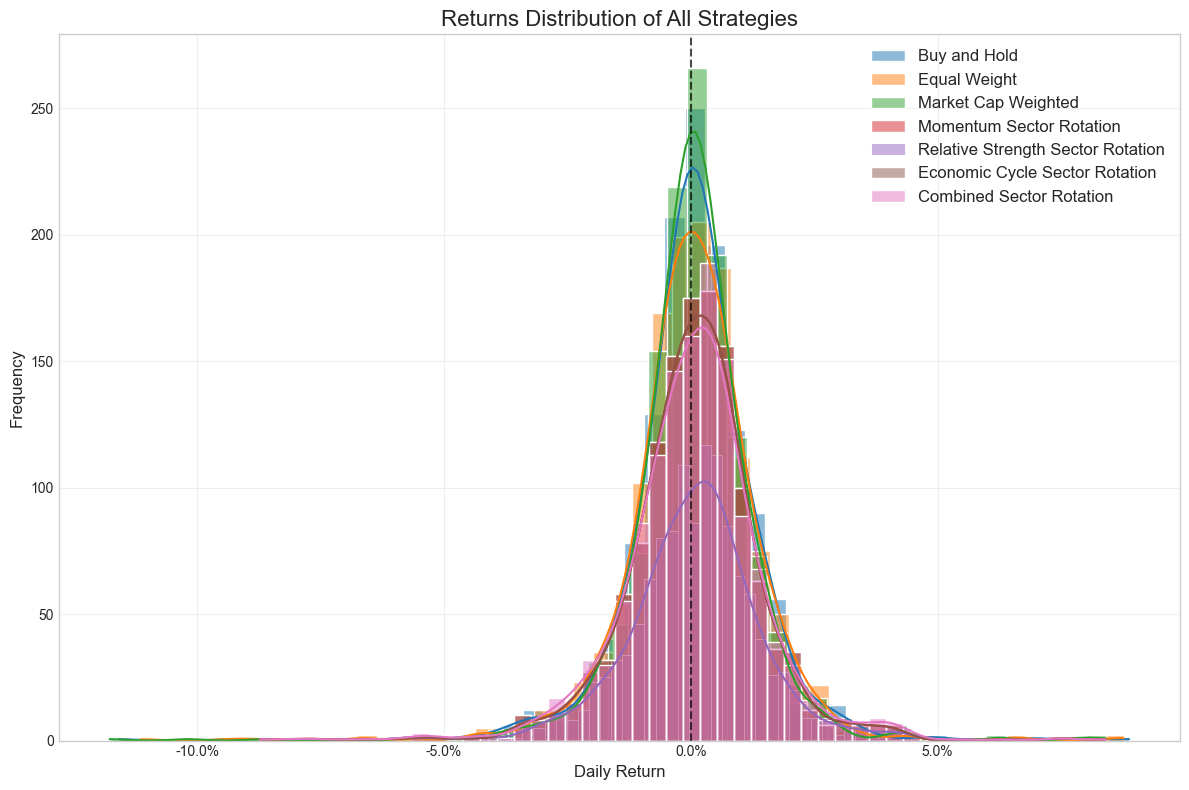

In [43]:
# Plot returns distribution
visualization.plot_returns_distribution(all_results, title="Returns Distribution of All Strategies")
plt.show()

2025-05-06 20:53:20,082 - src.backtesting.visualization - INFO - Plotting strategy correlation heatmap
2025-05-06 20:53:20,861 - src.backtesting.visualization - INFO - Strategy correlation heatmap saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\strategy_correlation.png


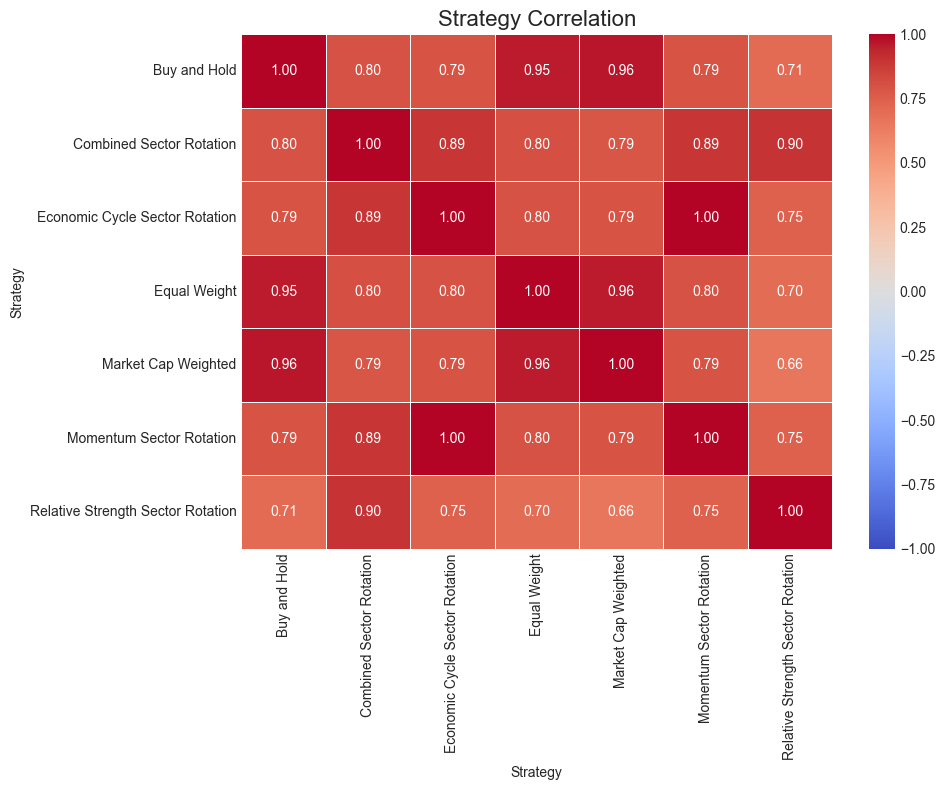

In [44]:
# Plot correlation heatmap
visualization.plot_correlation_heatmap(all_results, title="Strategy Correlation")
plt.show()

2025-05-06 20:53:25,329 - src.backtesting.visualization - INFO - Plotting underwater chart
2025-05-06 20:53:26,331 - src.backtesting.visualization - INFO - Underwater chart saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\underwater_chart.png


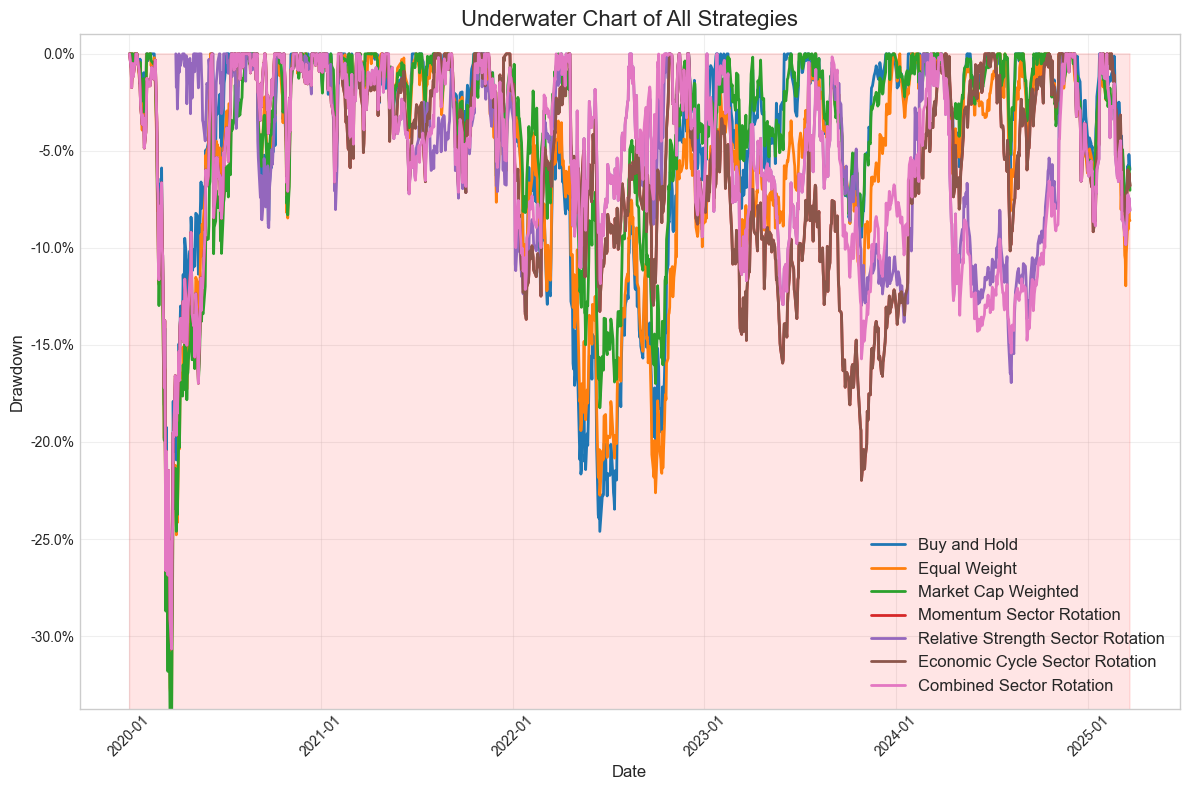

In [45]:
# Plot underwater chart
visualization.plot_underwater(all_results, title="Underwater Chart of All Strategies")
plt.show()

2025-05-06 20:53:30,666 - src.backtesting.visualization - INFO - Plotting risk vs return scatter plot
2025-05-06 20:53:31,308 - src.backtesting.visualization - INFO - Risk vs return scatter plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\risk_return_scatter.png


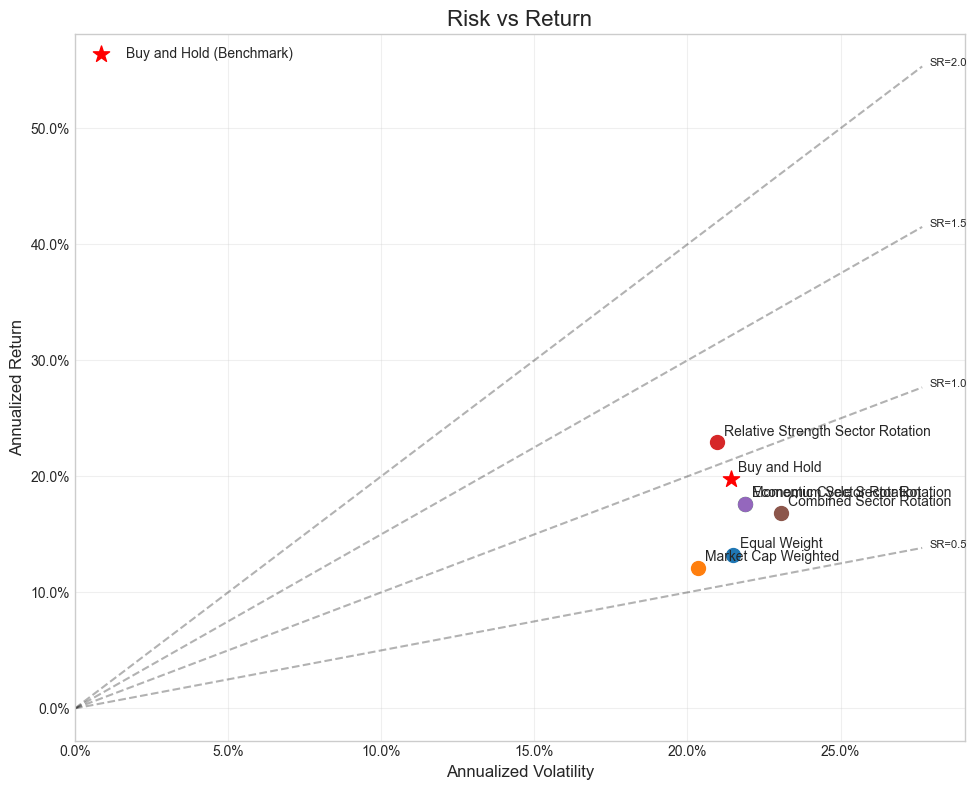

In [46]:
# Plot risk-return scatter
visualization.plot_risk_return_scatter(all_metrics, benchmark_strategy='Buy and Hold')
plt.show()

In [47]:
# Check and create Economic_Cycle column if needed
if 'Economic_Cycle' not in macro_data.columns:
    print("'Economic_Cycle' column not found in macro_data. Creating a simplified version for visualization.")
    
    # Create a simplified version of the Economic_Cycle column
    # This uses market returns as a simple proxy for economic cycles
    # 0: Contraction, 1: Early Recovery, 2: Expansion, 3: Late Cycle
    
    # First, get market returns data from benchmark results
    benchmark_returns = all_results[all_results['Strategy'] == 'Buy and Hold'].copy()
    
    # Calculate a 60-day moving average of returns
    benchmark_returns['MA_60d'] = benchmark_returns['Daily_Return'].rolling(window=60).mean()
    
    # Calculate rate of change for the moving average
    benchmark_returns['ROC'] = benchmark_returns['MA_60d'].pct_change(20)
    
    # Define cycles based on moving average and rate of change
    # Create a simplified cycle definition
    conditions = [
        (benchmark_returns['MA_60d'] < 0) & (benchmark_returns['ROC'] < 0),  # Contraction
        (benchmark_returns['MA_60d'] < 0) & (benchmark_returns['ROC'] > 0),  # Early Recovery
        (benchmark_returns['MA_60d'] > 0) & (benchmark_returns['ROC'] > 0),  # Expansion
        (benchmark_returns['MA_60d'] > 0) & (benchmark_returns['ROC'] < 0)   # Late Cycle
    ]
    values = [0, 1, 2, 3]
    
    # Add the cycle column
    benchmark_returns['Economic_Cycle'] = np.select(conditions, values, default=1)
    
    # Merge with macro_data
    macro_data = pd.merge(macro_data, benchmark_returns[['Date', 'Economic_Cycle']], 
                         on='Date', how='left')
    
    # Fill any missing values
    macro_data['Economic_Cycle'].fillna(1, inplace=True)
    macro_data['Economic_Cycle'] = macro_data['Economic_Cycle'].astype(int)
    
    print("Created simplified Economic_Cycle column in macro_data.")

'Economic_Cycle' column not found in macro_data. Creating a simplified version for visualization.
Created simplified Economic_Cycle column in macro_data.


2025-05-06 20:53:57,096 - src.backtesting.visualization - INFO - Plotting performance by market regime using Economic_Cycle
2025-05-06 20:53:58,365 - src.backtesting.visualization - INFO - Regime analysis plot saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports\figures\regime_analysis.png


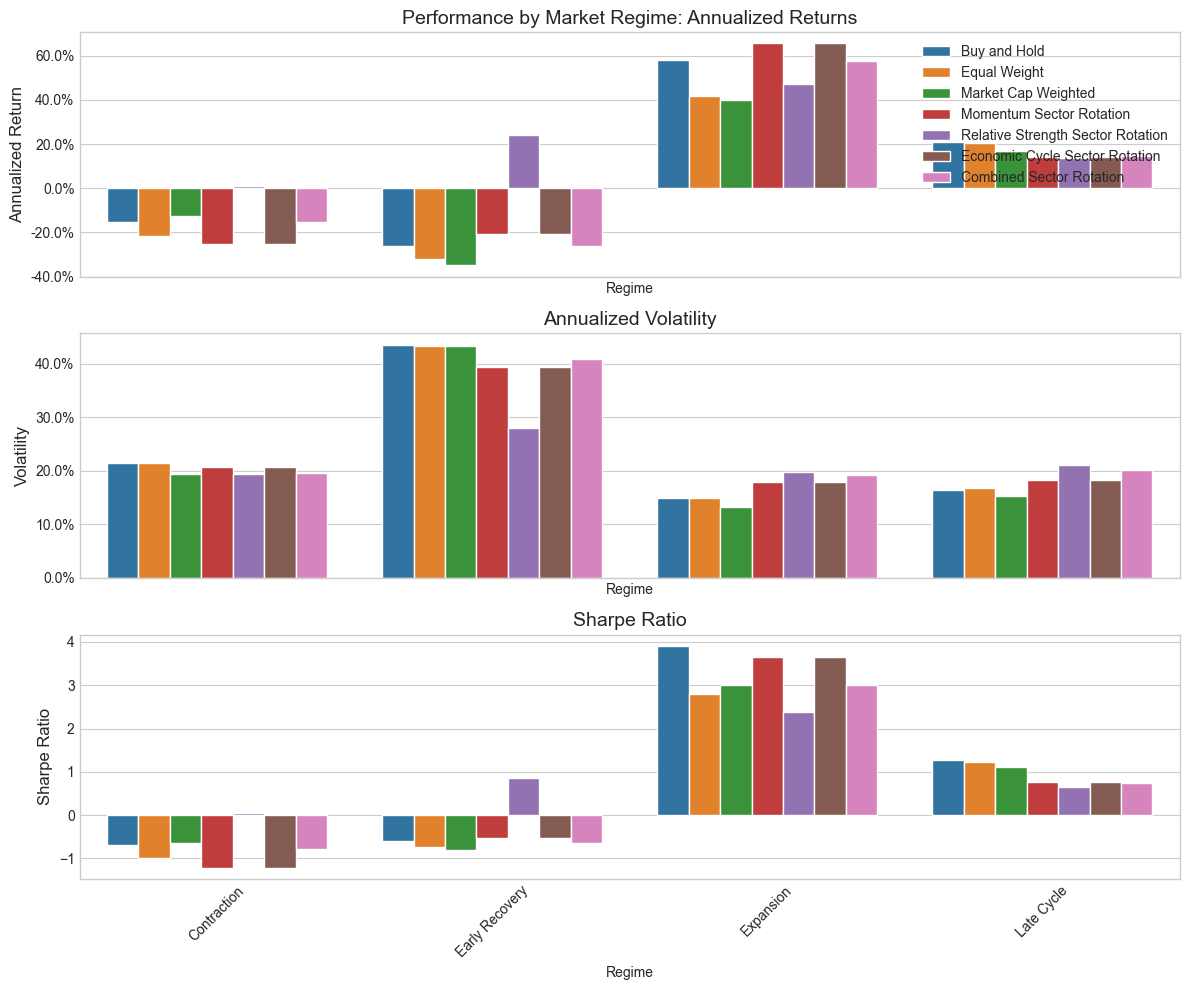

In [48]:
# Plot regime analysis
visualization.plot_regime_analysis(all_results, macro_data, regime_column='Economic_Cycle')
plt.show()

In [49]:
# Summarize the performance of all strategies
summary = all_metrics[['Strategy', 'annualized_return', 'volatility', 'sharpe_ratio', 'max_drawdown']].copy()
summary = summary.sort_values('sharpe_ratio', ascending=False)

In [50]:
# Format the columns
summary['annualized_return'] = summary['annualized_return'].map('{:.2%}'.format)
summary['volatility'] = summary['volatility'].map('{:.2%}'.format)
summary['sharpe_ratio'] = summary['sharpe_ratio'].map('{:.2f}'.format)
summary['max_drawdown'] = summary['max_drawdown'].map('{:.2%}'.format)

# Display the summary
print("Strategy Performance Summary (Ranked by Sharpe Ratio):")
display(summary)

Strategy Performance Summary (Ranked by Sharpe Ratio):


,Strategy,annualized_return,volatility,sharpe_ratio,max_drawdown
4,Relative Strength Sector Rotation,22.92%,20.97%,0.99,-16.94%
0,Buy and Hold,19.73%,21.41%,0.86,-30.43%
3,Momentum Sector Rotation,17.59%,21.89%,0.76,-30.67%
5,Economic Cycle Sector Rotation,17.59%,21.89%,0.76,-30.67%
6,Combined Sector Rotation,16.83%,23.05%,0.70,-30.67%
1,Equal Weight,13.24%,21.50%,0.59,-33.61%
2,Market Cap Weighted,12.09%,20.35%,0.57,-35.21%


In [51]:
# Identify the best-performing strategy
best_sharpe = summary.iloc[0]['Strategy']
best_return = all_metrics.loc[all_metrics['annualized_return'].idxmax(), 'Strategy']
best_drawdown = all_metrics.loc[all_metrics['max_drawdown'].idxmax(), 'Strategy']

print(f"\nBest Strategy by Sharpe Ratio: {best_sharpe}")
print(f"Best Strategy by Annualized Return: {best_return}")
print(f"Best Strategy by Maximum Drawdown: {best_drawdown}")


Best Strategy by Sharpe Ratio: Relative Strength Sector Rotation
Best Strategy by Annualized Return: Relative Strength Sector Rotation
Best Strategy by Maximum Drawdown: Relative Strength Sector Rotation


In [52]:
all_results.to_csv(reports_dir / "all_strategy_results.csv", index=False)
all_metrics.to_csv(reports_dir / "all_strategy_metrics.csv", index=False)

print(f"Results saved to {reports_dir}")

Results saved to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\reports
